In [2]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import os

# 0 Business Context and Approach (Arabella)

# 1 Exploratory Data Analysis (Kevin)

## 1.1 Summary Statistics

In [3]:
# Path to folder containing data file
path = "C://Users/farou/Jupyter projects/ML/GP/KKBOX-Churn/"

# Import raw data
kkbox_df = pd.read_csv(path + "kkbox_churn.csv")

kkbox_df.describe()

,is_churn,city,bd,registered_via,registration_init_time,count_userlogs_last_month,num_25_last_month,num_50_last_month,num_75_last_month,num_985_last_month,...,num_985_last_week,num_100_last_week,num_unq_last_week,total_secs_last_week,avg_payment_plan_days,avg_plan_list_price,avg_actual_amount_paid,last_payment_method_id,last_is_auto_renew,memberdays_left
count,970960.000000,860967.000000,860967.000000,860967.000000,8.609670e+05,754551.000000,754551.000000,754551.000000,754551.000000,754551.000000,...,667498.000000,667498.000000,667498.000000,6.674980e+05,933578.000000,933578.000000,933578.000000,933578.000000,933578.000000,933578.000000
mean,0.089942,5.937295,13.583854,6.892744,2.013265e+07,17.935095,108.773786,26.257260,16.545723,18.713420,...,5.459781,152.540436,147.539888,3.993535e+04,33.668171,144.078964,143.761684,38.899789,0.912113,332.568452
std,0.286099,6.441203,20.064040,1.937794,3.011174e+04,9.676949,179.003032,38.707599,22.399375,41.691069,...,12.573304,210.558298,167.310346,5.134569e+04,31.539039,133.629682,133.723976,3.785421,0.283130,2003.127209
min,0.000000,1.000000,-3152.000000,3.000000,2.004033e+07,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,3.400000e-02,0.000000,0.000000,0.000000,3.000000,0.000000,-74.000000
25%,0.000000,1.000000,0.000000,7.000000,2.012021e+07,9.000000,19.000000,5.000000,3.000000,3.000000,...,1.000000,32.000000,38.000000,9.159578e+03,30.000000,99.000000,99.000000,38.000000,1.000000,99.000000
50%,0.000000,1.000000,0.000000,7.000000,2.014060e+07,19.000000,55.000000,14.000000,10.000000,10.000000,...,3.000000,87.000000,96.000000,2.386404e+04,30.000000,149.000000,149.000000,41.000000,1.000000,100.000000
75%,0.000000,13.000000,27.000000,9.000000,2.016012e+07,27.000000,133.000000,33.000000,22.000000,23.000000,...,7.000000,188.000000,196.000000,5.018832e+04,30.000000,149.000000,149.000000,41.000000,1.000000,100.000000
max,1.000000,22.000000,2016.000000,13.000000,2.017042e+07,31.000000,46820.000000,3163.000000,1310.000000,15164.000000,...,4048.000000,16884.000000,4292.000000,4.196711e+06,450.000000,2000.000000,2000.000000,41.000000,1.000000,79281.000000


## 1.2 Correlations to Target Variable

## 1.3 Distribution & Correlation of Most Relevant Variables

Like here second example https://seaborn.pydata.org/generated/seaborn.pairplot.html

## 1.4 Distribution of Target Variable

Simple bar plot --> Show imbalance of dataset and need for over/ undersampling

# 2 Data Preparation (Fynn)

## 2.1 Handle Missing Values

In [4]:
# Get counts of missing values
print(kkbox_df.isna().sum())

# Get number of rows if we would remove all NaN
print("\nNumber of rows when removing all NaN:", len(kkbox_df.dropna().index))

# Get number of rows if we would remove all NaN after dropping gender
print("\nNumber of rows when removing all NaN without gender:",
      len(kkbox_df.drop("gender", axis=1).dropna().index))

msno                              0
is_churn                          0
city                         109993
bd                           109993
gender                       582055
registered_via               109993
registration_init_time       109993
count_userlogs_last_month    216409
num_25_last_month            216409
num_50_last_month            216409
num_75_last_month            216409
num_985_last_month           216409
num_100_last_month           216409
num_unq_last_month           216409
total_secs_last_month        216409
num_25_last_week             303462
num_50_last_week             303462
num_75_last_week             303462
num_985_last_week            303462
num_100_last_week            303462
num_unq_last_week            303462
total_secs_last_week         303462
avg_payment_plan_days         37382
avg_plan_list_price           37382
avg_actual_amount_paid        37382
last_payment_method_id        37382
last_is_auto_renew            37382
memberdays_left             

In [5]:
# Drop gender to preserve 336.447 rows
kkbox_df_clean = kkbox_df.drop("gender", axis=1)

# Fill missing values indicating no customer activity with zeros to preserve 168.933 rows
month_week_cols = kkbox_df_clean.filter(regex="month|week").columns
kkbox_df_clean[month_week_cols] = kkbox_df_clean[month_week_cols].fillna(0)

# Drop rows with missing values
kkbox_df_clean = kkbox_df_clean.dropna()

print("Size of NA cleaned dataset:", len(kkbox_df_clean.index))

Size of NA cleaned dataset: 825368


## 2.2 Handle Categorical Variables

In [6]:
# HANDLE FEATURE TYPES ---------------------------------------------------------

# Round all features
kkbox_df_clean.iloc[:,2:] = round(kkbox_df_clean.iloc[:,2:]).astype("int64")

# HANDLE CATEGORICAL FEATURES --------------------------------------------------

# Set correct types of categorical variables
cat_feats = ["city", "registered_via", "last_payment_method_id"]
kkbox_df_clean[cat_feats] = kkbox_df_clean[cat_feats].astype("category")

# One-hot encoding
encoder = preprocessing.OneHotEncoder(sparse=False)
cat_feats_onehot = encoder.fit_transform(kkbox_df_clean[cat_feats])
df_cat_feats_onehot = pd.DataFrame(cat_feats_onehot).astype("int64")
df_cat_feats_onehot.columns = encoder.get_feature_names(cat_feats)

# Append one-hot encoded features to data frame
kkbox_df_clean = pd.concat([kkbox_df_clean.reset_index(), df_cat_feats_onehot], axis=1)

# Remove not needed columns
kkbox_df_clean = kkbox_df_clean.drop(["index", "msno"] + cat_feats, axis=1)
kkbox_df_clean

c:\Users\farou\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,is_churn,bd,registration_init_time,count_userlogs_last_month,num_25_last_month,num_50_last_month,num_75_last_month,num_985_last_month,num_100_last_month,num_unq_last_month,...,last_payment_method_id_32,last_payment_method_id_33,last_payment_method_id_34,last_payment_method_id_35,last_payment_method_id_36,last_payment_method_id_37,last_payment_method_id_38,last_payment_method_id_39,last_payment_method_id_40,last_payment_method_id_41
0,1,20,20131223,6,0,4,2,0,26,30,...,0,0,0,0,1,0,0,0,0,0
1,1,18,20131227,20,239,57,32,22,205,432,...,0,0,0,0,0,0,0,0,0,0
2,1,0,20140109,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,35,20140125,15,9,7,4,4,962,548,...,0,0,0,0,0,0,0,0,0,1
4,1,0,20140126,4,6,1,1,4,37,48,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825363,0,25,20110830,24,117,26,30,25,461,429,...,0,0,0,0,0,0,0,0,0,1
825364,0,28,20110831,24,48,7,4,9,318,291,...,0,0,0,0,0,0,0,0,1,0
825365,0,0,20110903,5,43,8,8,7,22,54,...,0,0,0,0,0,0,0,0,0,1
825366,0,0,20110905,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## 2.3 Min-Max Normalization

Some models e.g. logistic regression or neural networks require features to be on a similar scale and be normally distributed. Scaled data may have advantages for modelling but can be complicated in interpreting the results for a business context. Min-max normalized customer age data for example is no longer related to the actual customer age and has, e.g. as a decision tree split attribute, no direct interpretable value anymore.

In [7]:
# Min-max scaling
mm_scaler = preprocessing.MinMaxScaler()
kkbox_mat_mmnorm = mm_scaler.fit_transform(kkbox_df_clean)

# Put back into pandas df
kkbox_df_mmnorm = pd.DataFrame(kkbox_mat_mmnorm, columns=kkbox_df_clean.columns)

kkbox_df_mmnorm

,is_churn,bd,registration_init_time,count_userlogs_last_month,num_25_last_month,num_50_last_month,num_75_last_month,num_985_last_month,num_100_last_month,num_unq_last_month,...,last_payment_method_id_32,last_payment_method_id_33,last_payment_method_id_34,last_payment_method_id_35,last_payment_method_id_36,last_payment_method_id_37,last_payment_method_id_38,last_payment_method_id_39,last_payment_method_id_40,last_payment_method_id_41
0,1.0,0.613777,0.698681,0.193548,0.000000,0.001265,0.001527,0.000000,0.000451,0.001282,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.613390,0.698712,0.645161,0.005105,0.018021,0.024427,0.001451,0.003554,0.018459,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.609907,0.766983,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.616680,0.767106,0.483871,0.000192,0.002213,0.003053,0.000264,0.016680,0.023416,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.609907,0.767114,0.129032,0.000128,0.000316,0.000763,0.000264,0.000642,0.002051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825363,0.0,0.614745,0.541930,0.774194,0.002499,0.008220,0.022901,0.001649,0.007993,0.018331,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
825364,0.0,0.615325,0.541938,0.774194,0.001025,0.002213,0.003053,0.000594,0.005514,0.012434,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
825365,0.0,0.609907,0.542491,0.161290,0.000918,0.002529,0.006107,0.000462,0.000381,0.002307,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
825366,0.0,0.609907,0.542506,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## 2.4 Standard Scaling

The standard scaler scales every variable's mean to 0 and standard deviation to 1.

In [8]:
# Standard scaling
st_scaler = preprocessing.StandardScaler()
kkbox_mat_stscale = st_scaler.fit_transform(kkbox_df_clean)

# Put back into pandas df and keep original binary target variable
kkbox_df_stscale = pd.DataFrame(kkbox_mat_stscale, columns=kkbox_df_clean.columns)
kkbox_df_stscale["is_churn"] = kkbox_df_clean["is_churn"]

kkbox_df_stscale

,is_churn,bd,registration_init_time,count_userlogs_last_month,num_25_last_month,num_50_last_month,num_75_last_month,num_985_last_month,num_100_last_month,num_unq_last_month,...,last_payment_method_id_32,last_payment_method_id_33,last_payment_method_id_34,last_payment_method_id_35,last_payment_method_id_36,last_payment_method_id_37,last_payment_method_id_38,last_payment_method_id_39,last_payment_method_id_40,last_payment_method_id_41
0,1,0.325039,-0.040935,-0.924594,-0.560476,-0.516732,-0.583841,-0.416305,-0.608982,-0.728398,...,-0.094353,-0.128128,-0.179739,-0.019663,3.347560,-0.215009,-0.231211,-0.290060,-0.311814,-1.079313
1,1,0.226053,-0.040803,0.370656,0.819897,0.894233,0.788135,0.131788,-0.368697,-0.043624,...,-0.094353,-0.128128,-0.179739,-0.019663,-0.298725,-0.215009,-0.231211,-0.290060,-0.311814,-1.079313
2,1,-0.664820,0.253308,-1.479701,-0.560476,-0.623220,-0.675306,-0.416305,-0.643884,-0.779501,...,-0.094353,-0.128128,-0.179739,-0.019663,-0.298725,-0.215009,-0.231211,-0.290060,-0.311814,0.926515
3,1,1.067434,0.253837,-0.091933,-0.508495,-0.436866,-0.492376,-0.316652,0.647485,0.153973,...,-0.094353,-0.128128,-0.179739,-0.019663,-0.298725,-0.215009,-0.231211,-0.290060,-0.311814,0.926515
4,1,-0.664820,0.253871,-1.109630,-0.525822,-0.596598,-0.629574,-0.316652,-0.594216,-0.697736,...,-0.094353,-0.128128,-0.179739,-0.019663,-0.298725,-0.215009,-0.231211,-0.290060,3.207036,-1.079313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825363,0,0.572504,-0.716210,0.740727,0.115272,0.068952,0.696670,0.206528,-0.025047,-0.048734,...,-0.094353,-0.128128,-0.179739,-0.019663,-0.298725,-0.215009,-0.231211,-0.290060,-0.311814,0.926515
825364,0,0.720983,-0.716177,0.740727,-0.283246,-0.436866,-0.492376,-0.192085,-0.217008,-0.283806,...,-0.094353,-0.128128,-0.179739,-0.019663,-0.298725,-0.215009,-0.231211,-0.290060,3.207036,-1.079313
825365,0,-0.664820,-0.713793,-1.017112,-0.312124,-0.410244,-0.309446,-0.241912,-0.614352,-0.687516,...,-0.094353,-0.128128,-0.179739,-0.019663,-0.298725,-0.215009,-0.231211,-0.290060,-0.311814,0.926515
825366,0,-0.664820,-0.713727,-1.479701,-0.560476,-0.623220,-0.675306,-0.416305,-0.643884,-0.779501,...,-0.094353,-0.128128,-0.179739,-0.019663,-0.298725,-0.215009,-0.231211,-0.290060,-0.311814,0.926515


## 2.5 Dimensionality Reduction: PCA

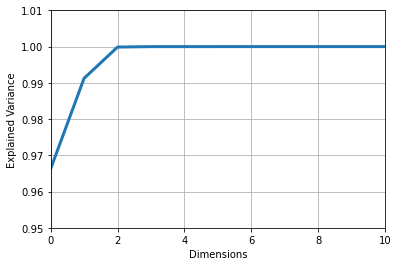

In [9]:
# Find the best number of features to preserve the original data variance
pca = PCA()
pca.fit(kkbox_df_clean.drop("is_churn", axis=1))
cumsum = np.cumsum(pca.explained_variance_ratio_)

# Plot elbow curve
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 10, 0.95, 1.01])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.grid(True)
plt.show()

Already at a reduction to two dimensions, all of the variance of the the original data is preserved. Therefore, we reduce to two dimensions:

In [10]:
pca = PCA(n_components=2)
kkbox_mat_pca = pca.fit_transform(kkbox_df_clean.drop("is_churn", axis=1))

# Put into data frame and add target
kkbox_df_pca = pd.DataFrame(kkbox_mat_pca, columns=["pca_comp_1", "pca_comp_2"])
kkbox_df_pca["is_churn"] = kkbox_df_clean["is_churn"]

kkbox_df_pca

,pca_comp_1,pca_comp_2,is_churn
0,-122318.696189,-2570.525260,1
1,-59806.351040,-1882.514662,1
2,-129191.361519,6196.598249,1
3,129477.670637,9029.518705,1
4,-119386.291691,6366.177212,1
...,...,...,...
825363,1522.511034,-21618.614370,0
825364,-52884.282369,-22190.552275,0
825365,-119074.871118,-22861.961165,0
825366,-128872.744051,-22963.243030,0


## 2.6 Dimensionality Reduction: T-SNE

In [11]:
tsne = TSNE(n_components=2)
kkbox_mat_tsne = pca.fit_transform(kkbox_df_clean.drop("is_churn", axis=1))

# Put into data frame and add target
kkbox_df_tsne = pd.DataFrame(kkbox_mat_tsne, columns=["tsne_comp_1", "tsne_comp_2"])
kkbox_df_tsne["is_churn"] = kkbox_df_clean["is_churn"]

kkbox_df_tsne

,tsne_comp_1,tsne_comp_2,is_churn
0,-122318.696189,-2570.525260,1
1,-59806.351040,-1882.514662,1
2,-129191.361519,6196.598249,1
3,129477.670637,9029.518705,1
4,-119386.291691,6366.177212,1
...,...,...,...
825363,1522.511034,-21618.614370,0
825364,-52884.282369,-22190.552275,0
825365,-119074.871118,-22861.961165,0
825366,-128872.744051,-22963.243030,0


**Preprocessing Fazit:**
We have conducted several techniques of data preprocessing to firstly clean our data and assure that we can train models on them without problems in the data frame *kkbox_df_clean* (no missing values & one-hot encoded categorical variables). Furthermore, we also created several versions of our base dataframe *kkbox_df_clean* which we can try out in the modelling stage if they lead to better models: we applied two types of normalization and scaling (*kkbox_df_mmnorm* & *kkbox_df_stscale*) and two types of dimensionality reduction (*kkbox_df_pca* & *kkbox_df_tsne*).

# 3 Modelling (Farouq)

In [12]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict
from sklearn.naive_bayes import BernoulliNB

In [13]:
def oversample(x, y):
    print(Counter(y))
    oversample = RandomOverSampler(sampling_strategy='minority')
    x_over, y_over = oversample.fit_resample(x, y)
    print(Counter(y_over))
    return x_over, y_over

In [14]:
X = kkbox_df_clean.drop("is_churn", axis=1)
y = kkbox_df_clean["is_churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train, y_train = oversample(X_train, y_train)

Counter({0: 617244, 1: 43050})
Counter({0: 617244, 1: 617244})


## 3.1 Logistic regression

<AxesSubplot:>

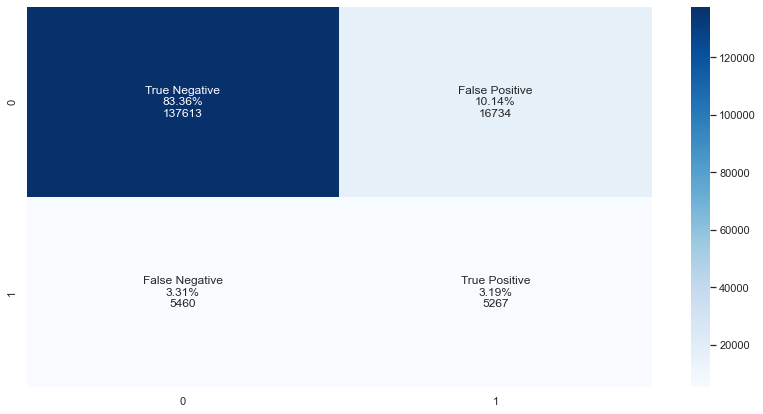

In [16]:
LR = LogisticRegression(random_state=42, max_iter=5000)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
               
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
               
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
               
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names, group_percentages, group_counts)]
               
labels = np.asarray(labels).reshape(2,2)

sns.set(rc = {'figure.figsize':(14,7)})
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [17]:
print(f'Accuracy of the model is {accuracy_score(y_test, y_pred)}')
print(f'Recall of the model is {recall_score(y_test, y_pred, average="macro")}')
print(f'Precision of the model is {precision_score(y_test, y_pred, average="macro", zero_division=1)}')

Accuracy of the model is 0.8655512073373154
Recall of the model is 0.6912929817610818
Precision of the model is 0.600617936231539


## 3.2 Logistic Regression with Regularization

In [18]:
alphas = [0.001, 0.01, 0.1, 1]
for alpha in alphas:
    LR = LogisticRegression(random_state=42, C=alpha, max_iter=5000)
    model = LR.fit(X_train, y_train)
    y_pred_ = LR.predict(X_test)
    print(f'For Alpha = {alpha}')
    print(f'Accuracy of the model is is {accuracy_score(y_test, y_pred_)}')
    print(f'Recall of the model is is {recall_score(y_test, y_pred_, average="macro")}')
    print(f'Precision of the model is is {precision_score(y_test, y_pred_, average="macro", zero_division=1)}\n')

For Alpha = 0.001
Accuracy of the model is is 0.8655390915589372
Recall of the model is is 0.6912865028531665
Precision of the model is is 0.6006067892413778

For Alpha = 0.01
Accuracy of the model is is 0.8655451494481263
Recall of the model is is 0.6912897423071241
Precision of the model is is 0.6006123624901345

For Alpha = 0.1
Accuracy of the model is is 0.8655512073373154
Recall of the model is is 0.6912929817610818
Precision of the model is is 0.600617936231539

For Alpha = 1
Accuracy of the model is is 0.8655512073373154
Recall of the model is is 0.6912929817610818
Precision of the model is is 0.600617936231539



## 3.3 Lasso Regression

<AxesSubplot:>

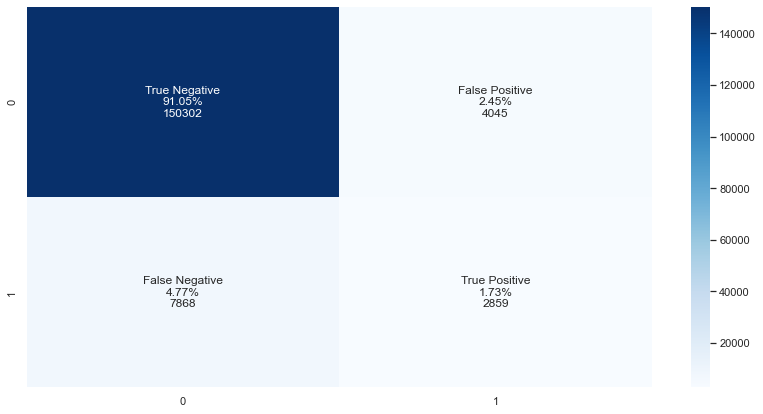

In [47]:
LA=Lasso(alpha=0.1, random_state=42, max_iter=5000)
LA.fit(X_train,y_train)
y_pred_over = LR.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_over)
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
               
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
               
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
               
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names, group_percentages, group_counts)]
               
labels = np.asarray(labels).reshape(2,2)

sns.set(rc = {'figure.figsize':(14,7)})
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [48]:
print(f'Accuracy of the model is {accuracy_score(y_test, y_pred_over)}')
print(f'Recall of the model is {recall_score(y_test, y_pred_over, average="macro")}')
print(f'Precision of the model is {precision_score(y_test, y_pred_over, average="macro", zero_division=1)}')

Accuracy of the model is 0.9278323660903595
Recall of the model is 0.6201582713310694
Precision of the model is 0.6821819086142482


## 3.4 DecisionTree classifier

In [19]:
DTC = DecisionTreeClassifier(max_depth =3, random_state = 42)
DTC.fit(X_train, y_train)
y_test_pred = DTC.predict(X_test)
tree_rules = export_text(DTC, feature_names = list(X.columns))
print(tree_rules)

|--- memberdays_left <= 197.50
|   |--- memberdays_left <= 98.50
|   |   |--- memberdays_left <= 26.50
|   |   |   |--- class: 1
|   |   |--- memberdays_left >  26.50
|   |   |   |--- class: 1
|   |--- memberdays_left >  98.50
|   |   |--- memberdays_left <= 100.50
|   |   |   |--- class: 0
|   |   |--- memberdays_left >  100.50
|   |   |   |--- class: 0
|--- memberdays_left >  197.50
|   |--- last_payment_method_id_39 <= 0.50
|   |   |--- memberdays_left <= 19199.50
|   |   |   |--- class: 1
|   |   |--- memberdays_left >  19199.50
|   |   |   |--- class: 1
|   |--- last_payment_method_id_39 >  0.50
|   |   |--- memberdays_left <= 204.00
|   |   |   |--- class: 0
|   |   |--- memberdays_left >  204.00
|   |   |   |--- class: 1



<AxesSubplot:>

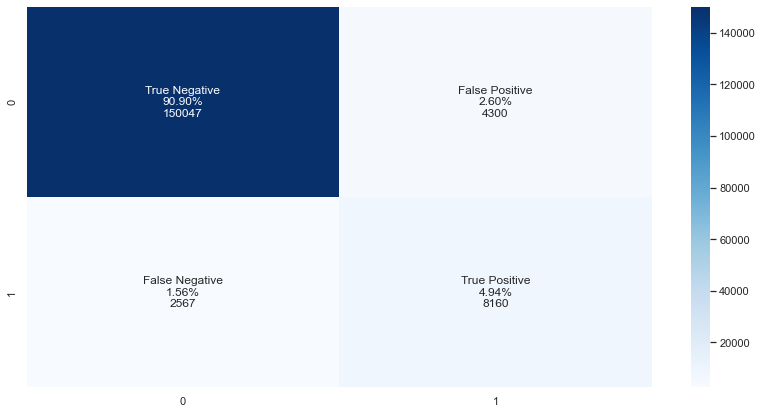

In [20]:
cf_matrix = confusion_matrix(y_test, y_test_pred)
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
               
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
               
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
               
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names, group_percentages, group_counts)]
               
labels = np.asarray(labels).reshape(2,2)

sns.set(rc = {'figure.figsize':(14,7)})
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [21]:
print(f'Accuracy of the model is {accuracy_score(y_test, y_test_pred)}')
print(f'Recall of the model is {recall_score(y_test, y_test_pred, average="macro")}')
print(f'Precision of the model is {precision_score(y_test, y_test_pred, average="macro", zero_division=1)}')

Accuracy of the model is 0.9584004749385124
Recall of the model is 0.8664190009139984
Precision of the model is 0.8190377265225053


***PRIMARY OBJECTIVE IS TO KEEP FALSE NEGATIVES LOW BECAUSE WHEN COSTUMOERS PREEDICTED TO STAY ACTUALLY CHRUN, WE LOOSE MONEY. SECONDLY, FALSE POSITIVES COSTUMERS THAT WE EXPECTED TO CHURN BUT ACTUALLY STAY MIGHT FROM THE BUSINESS PERSPECTIVE ALSO BE A LOSS BECAUSE IT MIGHT CAUSE COSTS BECAUSE EXPENSES HAVE BEEN PUT THERE AND MEASURES IN MARKETING TO KEEP THEM IN***

## 3.5 Random Forest Classifier

In [50]:
rndF = RandomForestClassifier(n_estimators=150, max_depth=3, random_state=42)
rndF.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=150, random_state=42)

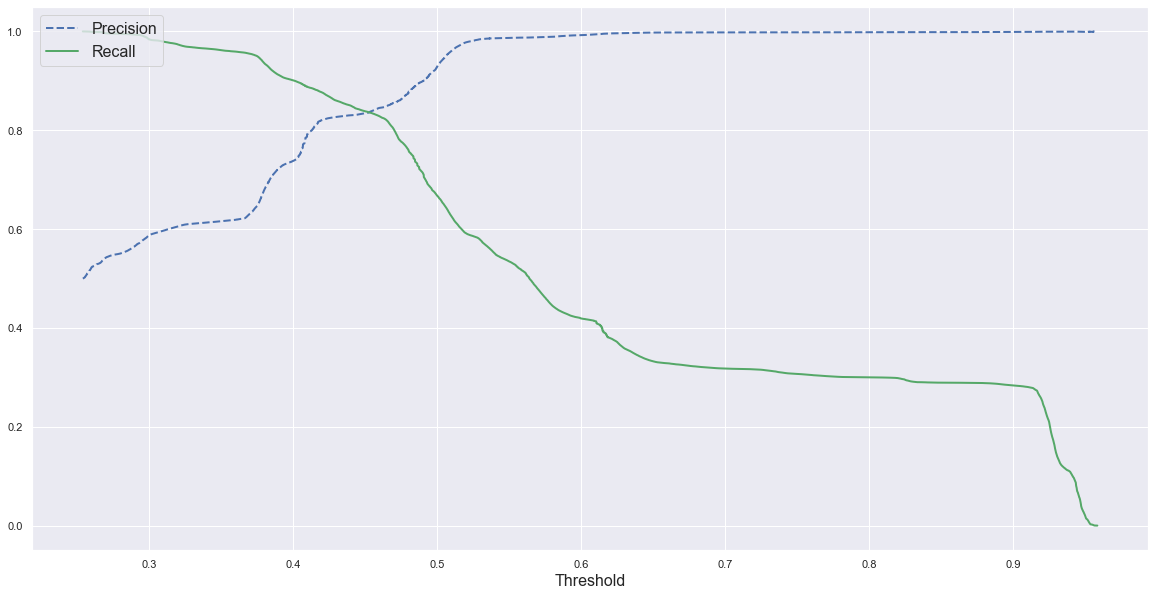

In [52]:
y_scores = pd.DataFrame(cross_val_predict(rndF, X_train, y_train, cv=5, method="predict_proba"))[1]
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)

plt.figure(figsize=(20, 10))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.show()

<AxesSubplot:>

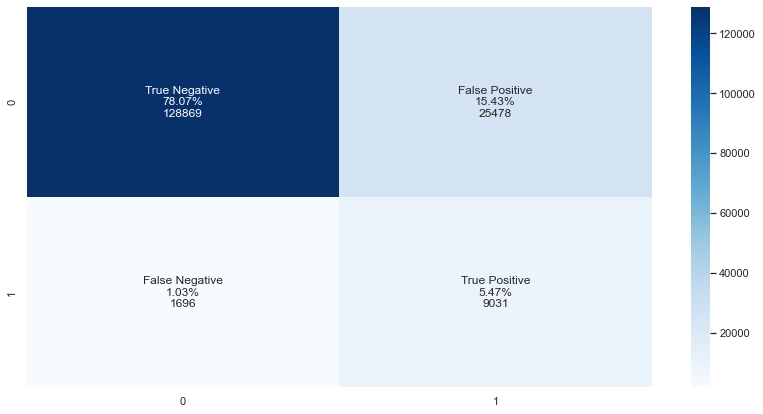

In [53]:
threshold = 0.45

predicted_proba = rndF.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

cf_matrix = confusion_matrix(y_test, predicted)
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
               
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
               
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
               
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names, group_percentages, group_counts)]
               
labels = np.asarray(labels).reshape(2,2)

sns.set(rc = {'figure.figsize':(14,7)})
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [54]:
print(f'Accuracy of the model is {accuracy_score(y_test, predicted)}')
print(f'Recall of the model is {recall_score(y_test, predicted, average="macro")}')
print(f'Precision of the model is {precision_score(y_test, predicted, average="macro", zero_division=1)}')

Accuracy of the model is 0.8353829191756424
Recall of the model is 0.8384123347911927
Precision of the model is 0.6243550738996649


## 3.6 Naive Bayes Classifier

<AxesSubplot:>

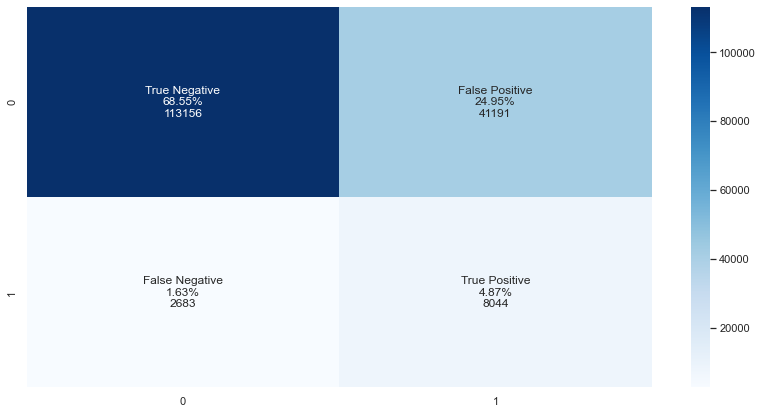

In [56]:
BNB = BernoulliNB()
BNB.fit(X_train, y_train)
y_pred = BNB.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
               
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
               
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
               
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names, group_percentages, group_counts)]
               
labels = np.asarray(labels).reshape(2,2)

sns.set(rc = {'figure.figsize':(14,7)})
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [57]:
print(f'Accuracy of the model is {accuracy_score(y_test, y_pred)}')
print(f'Recall of the model is {recall_score(y_test, y_pred, average="macro")}')
print(f'Precision of the model is {precision_score(y_test, y_pred, average="macro", zero_division=1)}')

Accuracy of the model is 0.7342161697178236
Recall of the model is 0.7415053878376563
Precision of the model is 0.5701091263533086


So far we've tested 6 Machine Learning models, and depending on our confusions matrices, we take that the best model that explains and predicts the data is Decision Trees. Let's perform a RandomSearch to find better hyperparameters for the model.

In [22]:
from sklearn.model_selection import RandomizedSearchCV
def get_results(model):
    mean_train = model.cv_results_['mean_train_score']
    mean_test = model.cv_results_['mean_test_score']
    params = model.cv_results_['params']
    res = pd.DataFrame(data = zip(mean_train, mean_test, params), columns = ['Mean_Train', 'Mean_Test', 'Params'])    
    res = res.drop('Params', axis=1).join(pd.DataFrame(res.Params.values.tolist()))
    return res

DTC = DecisionTreeClassifier(random_state = 42)


DTC_Grid_params = { 'max_depth' : [2,3,6,9,10],
                    'criterion' : ['gini', 'entropy'],
                  }

RndMSearch = RandomizedSearchCV(estimator=DTC,
                                     param_distributions=DTC_Grid_params,
                                     cv=10,
                                     n_iter = 400,
                                     scoring='roc_auc',
                                     return_train_score=True,
                                     verbose=3)


#Fit Grid
RndMSearch_fit = RndMSearch.fit(X_train, y_train)
Results = get_results(RndMSearch_fit)

c:\Users\farou\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 10 is smaller than n_iter=400. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END criterion=gini, max_depth=2;, score=(train=0.870, test=0.870) total time=   4.7s
[CV 2/10] END criterion=gini, max_depth=2;, score=(train=0.870, test=0.872) total time=   6.3s
[CV 3/10] END criterion=gini, max_depth=2;, score=(train=0.870, test=0.870) total time=   4.9s
[CV 4/10] END criterion=gini, max_depth=2;, score=(train=0.870, test=0.871) total time=   4.7s
[CV 5/10] END criterion=gini, max_depth=2;, score=(train=0.870, test=0.872) total time=   4.8s
[CV 6/10] END criterion=gini, max_depth=2;, score=(train=0.870, test=0.870) total time=   4.7s
[CV 7/10] END criterion=gini, max_depth=2;, score=(train=0.870, test=0.871) total time=   4.5s
[CV 8/10] END criterion=gini, max_depth=2;, score=(train=0.870, test=0.869) total time=   4.6s
[CV 9/10] END criterion=gini, max_depth=2;, score=(train=0.871, test=0.868) total time=   4.6s
[CV 10/10] END criterion=gini, max_depth=2;, score=(train=0.870, test=0.870) total

In [23]:
Results

,Mean_Train,Mean_Test,max_depth,criterion
0,0.870294,0.870294,2,gini
1,0.928173,0.928172,3,gini
2,0.974412,0.974374,6,gini
3,0.980302,0.980079,9,gini
4,0.982471,0.982135,10,gini
5,0.863052,0.863051,2,entropy
6,0.926529,0.926512,3,entropy
7,0.974589,0.974553,6,entropy
8,0.980563,0.980357,9,entropy
9,0.982729,0.982367,10,entropy


In [24]:
DTC=DecisionTreeClassifier(criterion="entropy", max_depth=10, random_state = 42)
DTC.fit(X_train, y_train)
y_test_pred = DTC.predict(X_test)
tree_rules = export_text(DTC, feature_names = list(X.columns))
print(tree_rules)

# 4 Final Pipeline (Vaclav)

# 5 Business Implications (Arabella)